In [0]:
# setting up  the environment

import tensorflow as tf
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


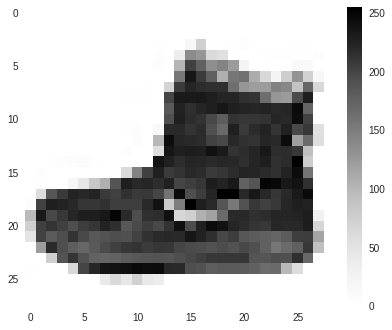

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
sample_image = x_train[0]
plt.imshow(sample_image)
plt.colorbar() # to check the max and min values of the pixles
plt.grid(False)


In [0]:
x_train = x_train / 255.
x_test = x_test / 255.

plt.figure(figsize=(10,10))

for i in range(1,26):
  plt.subplot(5,5, i)
  plt.imshow(x_train[i], cmap=plt.cm.jet)
  plt.xticks([]) # to make space for the label
  plt.xlabel(class_names[y_train[i]])

In [0]:
x_train.shape


(60000, 28, 28, 1)

In [0]:
# this is not a conv model
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # no parameters to learn. No activation ?
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 99us/step - loss: 0.5211 - acc: 0.8187 - val_loss: 0.4164 - val_acc: 0.8547
Epoch 2/5
48000/48000 [==============================] - 4s 84us/step - loss: 0.3871 - acc: 0.8603 - val_loss: 0.4220 - val_acc: 0.8494
Epoch 3/5
48000/48000 [==============================] - 4s 82us/step - loss: 0.3475 - acc: 0.8733 - val_loss: 0.3601 - val_acc: 0.8682
Epoch 4/5
48000/48000 [==============================] - 4s 85us/step - loss: 0.3236 - acc: 0.8807 - val_loss: 0.3893 - val_acc: 0.8575
Epoch 5/5
48000/48000 [==============================] - 4s 85us/step - loss: 0.3013 - acc: 0.8898 - val_loss: 0.3283 - val_acc: 0.8818


In [0]:
# test one hot encoding
# test the model 
# how to run an image through a layer
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/step
Test accuracy: 0.8737


In [0]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.imshow(img, cmap=plt.cm.jet)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color='green'
  else:
    color='red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]), color=color)

  
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)

In [0]:
print(model)
print(model.layers)
plt.imshow(x_test[0])
pred = model.predict(np.expand_dims(x_test[0], 0))
print(pred)
print(class_names[np.argmax(pred)])


In [0]:
# attempting the convolutional neutal network implementation

cnn_model = keras.Sequential()

cnn_model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=2,padding='same', activation='relu', input_shape=(28,28,1)))
# cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# cnn_model.add(tf.keras.layers.Dropout(0.3))
# cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

In [0]:
cnn_model.summary()

cnn_model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.predict(np.expand_dims(x_test[0],0))


cnn_model.predict(np.expand_dims(x_test[0],0))

In [0]:
# A trial of NN 

import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(x_train.shape)
input_shape = x_train[0].shape

# normalize images
def normalize(x):
  return x / 255.

x_train = normalize(x_train)
x_test = normalize(x_test)

lb = LabelBinarizer().fit(np.unique(y_train))
# y_train = lb.transform(y_train)
# y_test = lb.transform(y_test)
print(input_shape)
model = keras.models.Sequential()
model.add(keras.layers.Convolution2D(filters=64, kernel_size=3, padding='same', input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=2))



# model.add(Flatten())

# # Fully connected layer
# model.add(Dense(512))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10))

# model.add(Activation('softmax'))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary()

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


(60000, 28, 28)
(60000, 28, 28, 1)
(28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12544)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                125450    
Total params: 126,090
Trainable params: 126,090
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.45901730822523434, 0.34216550868252915, 0.3095646214360992, 0.28895502532770234, 0.2727298660253485]


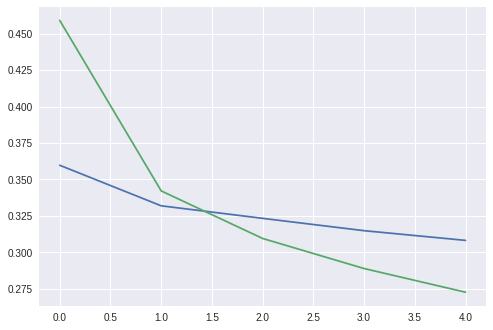

In [0]:
plt.plot(history.epoch, history.history['val_loss'])
plt.plot(history.epoch, history.history['loss'])

print(history.history.keys())
print(history.history['loss'])

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 335us/step
Test accuracy: 0.8903


In [0]:
import matplotlib.pyplot as plt
img = x_test[10]
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_name="conv2d_17"
layer_output = layer_dict[layer_name].output

init_op = tf.initialize_all_variables()

with tf.Session() as sess:
  
  print(layer_output[:,:,:,0])
  conv_img = model.predict(np.expand_dims(img,0))
